# Question 4 is after Question 5

# Question 5 (a)

In [391]:
# Data generation 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def sample_creation(sample_size):
    x1 = np.random.uniform(-1, 1, size = sample_size)
    x2 = np.random.uniform(-1, 1, size = sample_size)
    f = 4*x1**2-(2.1)*x1**4+(1/3)*x1**6+x1*x2-4*x2**2+4*x2**4
    return x1, x2, f

def combine_features(x1, x2):
    x = np.array([x1, x2]).T
    return x

# create the 1st training data set with 30 observations
x1_30, x2_30, y_30 = sample_creation(30)
x_30 = combine_features(x1_30, x2_30)
# create the 2nd training data set with 300 observations
x1_300, x2_300, y_300 = sample_creation(300)
x_300 = combine_features(x1_300, x2_300)
# create the testing data set with 500 observations
x1_500, x2_500, y_500 = sample_creation(500)
x_500 = combine_features(x1_500, x2_500)

In [470]:
y_300

array([-5.45071915e-01, -2.07617913e-01,  1.95528181e+00,  9.50057695e-01,
        7.31472739e-02, -3.50959235e-01,  6.82990463e-01, -7.68483637e-01,
        1.56636792e-01, -9.36856283e-01,  2.13725483e-02,  2.80904822e+00,
        3.59823031e-01,  5.45895614e-01,  1.45599800e+00,  3.48354225e-01,
        5.88081162e-01, -9.31683542e-01, -9.69430932e-01,  1.44948959e+00,
        1.01575120e-01,  1.86572714e+00,  3.47411799e-01,  2.78642874e-01,
       -1.14848581e-01,  1.36537996e+00, -2.70380844e-01, -6.17944454e-01,
        6.19433521e-01,  1.51058119e+00, -9.01810410e-01, -4.34794775e-01,
        1.77007674e+00,  7.79180522e-01,  2.01936731e+00,  6.10725374e-01,
       -9.97421011e-01, -4.41216728e-01,  2.48703810e-03, -4.90021049e-01,
        5.52888293e-01,  1.40821514e+00, -8.74714348e-01,  6.46015496e-01,
       -2.64448762e-01,  4.57956840e-01,  9.97352608e-03,  3.60975017e-01,
        1.55857241e+00,  1.73326715e+00, -1.36479949e-01, -2.94509099e-01,
        4.89792088e-01, -

In [392]:
# normalize target value to (-1,1) for training and testing
from sklearn.preprocessing import normalize
normalized_y_30 = y_30 / np.linalg.norm(y_30)
normalized_y_300 = y_300 / np.linalg.norm(y_300)
normalized_y_500 = y_500 / np.linalg.norm(y_500)

In [393]:
# use bipolar sigmoid as activation function
def sigmoid(x):
    return (2 / (1 + np.exp(-x))) - 1

def mean_squared_error(pred_value, target_value, N):
    mse = ((pred_value - target_value)**2).sum() / N
    return mse

def mean_absolute_error(pred_value, target_value, N):
    mae = abs(pred_value - target_value).sum() / N
    return mae

def root_mean_squared_error(pred_value, target_value, N):
    rmse = (math.sqrt(((abs(pred_value - target_value))**2).sum())) / N
    return rmse

In [394]:
# train a neural network with training dataset size of 30
learn_rate = 0.25
epochs = 1000
N = normalized_y_30.size
x_train = x_30
y_train = normalized_y_30 

# number of units for input layer, hidden layer and output layer
n_input = 2
n_hidden = 2
n_output = 1

# create the initial weights
np.random.seed(5)
w_1 = np.random.normal(size=(n_input, n_hidden))   # (2, 2)
w_2 = np.random.normal(size=(n_hidden, n_output))  # (2, 1)

mse_list = []
mae_list = []
rmse_list = []
r2_list = []

In [395]:
for epoch in range(epochs):    
    
    # feedforward on hidden layer
    input_hidden_layer = np.dot(x_train, w_1)
    output_hidden_layer = sigmoid(input_hidden_layer)
    # on ouput layer
    input_output_layer = np.dot(output_hidden_layer, w_2)
    output_output_layer = sigmoid(input_output_layer)
    
    
    # calculate error metric and record it into lists
    mse = mean_squared_error(output_output_layer, y_train, N)
    mae = mean_absolute_error(output_output_layer, y_train, N)
    rmse = root_mean_squared_error(output_output_layer, y_train, N)
    r2_square = r2_score(y_train, output_output_layer)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2_square)
    
    # backpropagation 
    er_output_layer = output_output_layer - y_train.reshape((y_train.size, 1))
    delta_output_layer = er_output_layer * (1/2) * (1+ output_output_layer) * (1 - output_output_layer)

    er_hidden_layer = np.dot(delta_output_layer, w_2.T)
    delt_hidden_layer = er_hidden_layer * (1/2) * (1+ output_hidden_layer) * (1 - output_hidden_layer)

    
    # weight updates
    w_2_update = np.dot(output_hidden_layer.T, delta_output_layer) / N
    w_1_update = np.dot(x_train.T, delt_hidden_layer) / N

    w_2 = w_2 - learn_rate * w_2_update
    w_1 = w_1 - learn_rate * w_1_update

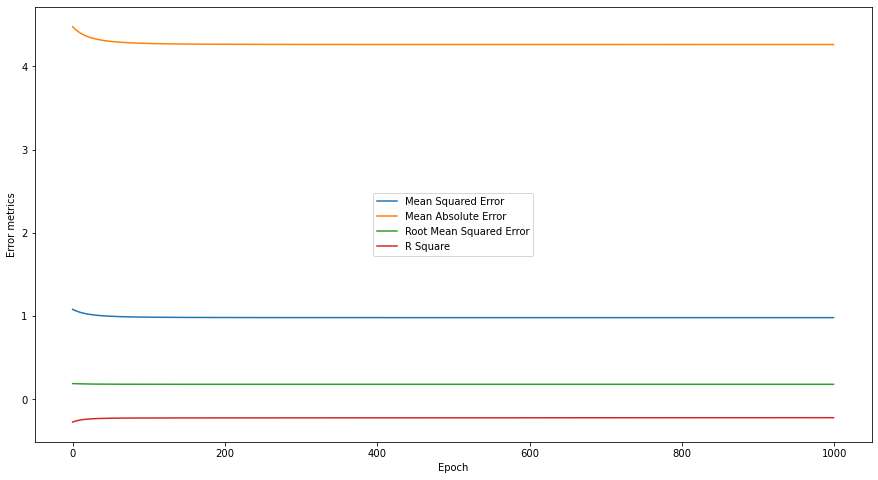

In [396]:
df_error_metric = pd.DataFrame({"Mean Squared Error": mse_list, "Mean Absolute Error": mae_list, "Root Mean Squared Error": rmse_list, "R Square": r2_list})
ax = df_error_metric.plot(figsize=(15, 8))
ax.set_xlabel("Epoch")
ax.set_ylabel("Error metrics")
ax.legend(loc='center')

<AxesSubplot:title={'center':'R2 Score'}>

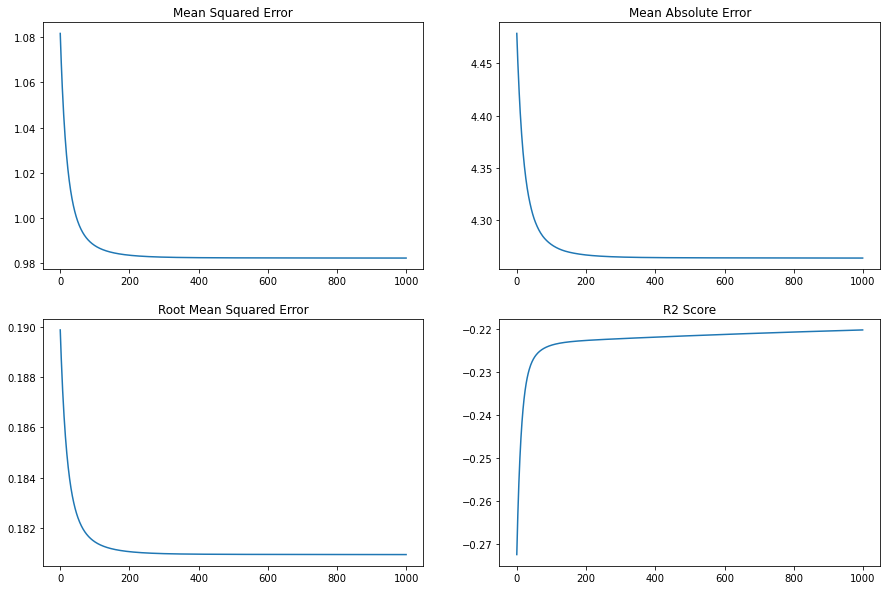

In [397]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

df_error_metric = pd.DataFrame({"Mean_Squared_Error": mse_list, "Mean_Absolute_Error": mae_list, "Root_Mean_Squared_Error": rmse_list, "R2": r2_list})
#ax = df_error_metric.plot()
df_error_metric.Mean_Squared_Error.plot(ax=axes[0,0], title="Mean Squared Error")
df_error_metric.Mean_Absolute_Error.plot(ax=axes[0,1], title="Mean Absolute Error")
df_error_metric.Root_Mean_Squared_Error.plot(ax=axes[1,0], title="Root Mean Squared Error")
df_error_metric.R2.plot(ax=axes[1,1], title="R2 Score")

In [398]:
# test on dataset of size 500

# feedforward on hidden layer
input_hidden_layer = np.dot(x_500, w_1)
output_hidden_layer = sigmoid(input_hidden_layer)
# on ouput layer
input_output_layer = np.dot(output_hidden_layer, w_2)
output_output_layer = sigmoid(input_output_layer)

N = y_500.size
normalized_y_500 = normalized_y_500.reshape((N, 1))
# evaluate the testing through error metrics
mse = mean_squared_error(output_output_layer, normalized_y_500, N)
mae = mean_absolute_error(output_output_layer, normalized_y_500, N)
rmse = root_mean_squared_error(output_output_layer, normalized_y_500, N)
r2_square = r2_score(normalized_y_500, output_output_layer)

In [399]:
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R Square: ", r2_square)

Mean Squared Error:  0.004311068598832785
Mean Absolute Error:  0.04739281321621516
Root Mean Squared Error:  0.00293634759483028
R Square:  -1.602704466711014


In [400]:
# train a neural network with training dataset size of 300
learn_rate = 0.25
epochs = 1000
N = normalized_y_300.size
x_train = x_300
y_train = normalized_y_300

# number of units for input layer, hidden layer and output layer
n_input = 2
n_hidden = 2
n_output = 1

# create the initial weights
np.random.seed(5)
w_1 = np.random.normal(size=(n_input, n_hidden))   # (2, 2)
w_2 = np.random.normal(size=(n_hidden, n_output))  # (2, 1)

mse_list = []
mae_list = []
rmse_list = []
r2_list = []

In [401]:
for epoch in range(epochs):    
    
    # feedforward on hidden layer
    input_hidden_layer = np.dot(x_train, w_1)
    output_hidden_layer = sigmoid(input_hidden_layer)
    # on ouput layer
    input_output_layer = np.dot(output_hidden_layer, w_2)
    output_output_layer = sigmoid(input_output_layer)
    
    
    # calculate error metric and record it into lists
    mse = mean_squared_error(output_output_layer, y_train, N)
    mae = mean_absolute_error(output_output_layer, y_train, N)
    rmse = root_mean_squared_error(output_output_layer, y_train, N)
    r2_square = r2_score(y_train, output_output_layer)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2_square)
    
    # backpropagation 
    er_output_layer = output_output_layer - y_train.reshape((y_train.size, 1))
    delta_output_layer = er_output_layer * (1/2) * (1+ output_output_layer) * (1 - output_output_layer)

    er_hidden_layer = np.dot(delta_output_layer, w_2.T)
    delt_hidden_layer = er_hidden_layer * (1/2) * (1+ output_hidden_layer) * (1 - output_hidden_layer)

    
    # weight updates
    w_2_update = np.dot(output_hidden_layer.T, delta_output_layer) / N
    w_1_update = np.dot(x_train.T, delt_hidden_layer) / N

    w_2 = w_2 - learn_rate * w_2_update
    w_1 = w_1 - learn_rate * w_1_update

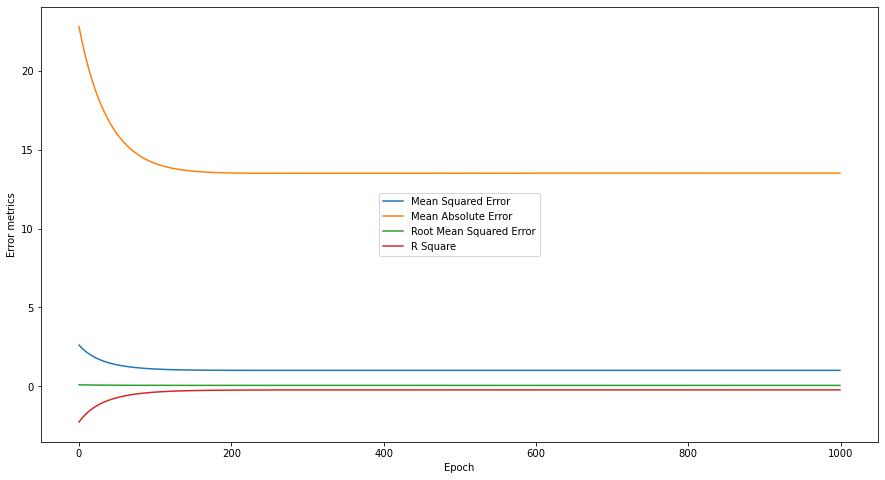

In [402]:
df_error_metric = pd.DataFrame({"Mean Squared Error": mse_list, "Mean Absolute Error": mae_list, "Root Mean Squared Error": rmse_list, "R Square": r2_list})
ax = df_error_metric.plot(figsize=(15, 8))
ax.set_xlabel("Epoch")
ax.set_ylabel("Error metrics")
ax.legend(loc='center')

<AxesSubplot:title={'center':'R2 Score'}>

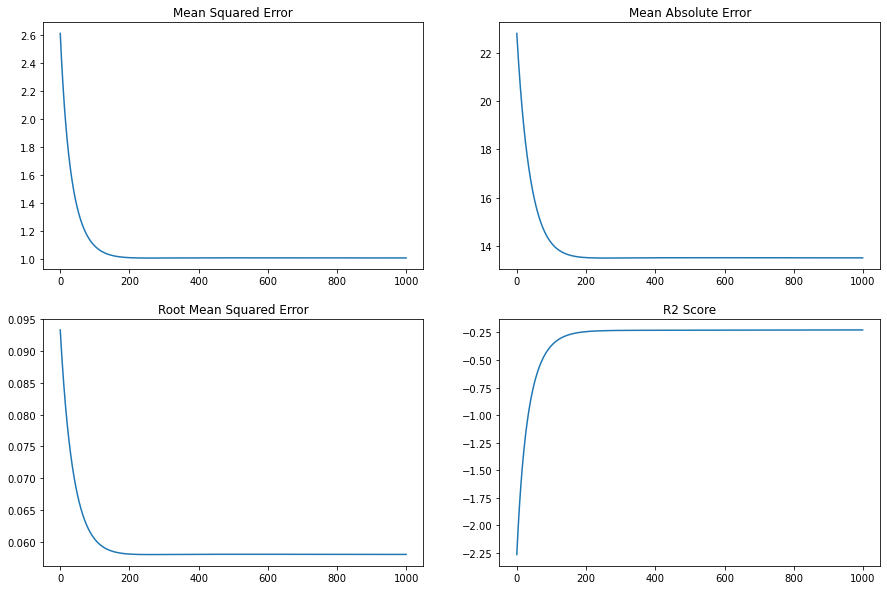

In [403]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

df_error_metric = pd.DataFrame({"Mean_Squared_Error": mse_list, "Mean_Absolute_Error": mae_list, "Root_Mean_Squared_Error": rmse_list, "R2": r2_list})
#ax = df_error_metric.plot()
df_error_metric.Mean_Squared_Error.plot(ax=axes[0,0], title="Mean Squared Error")
df_error_metric.Mean_Absolute_Error.plot(ax=axes[0,1], title="Mean Absolute Error")
df_error_metric.Root_Mean_Squared_Error.plot(ax=axes[1,0], title="Root Mean Squared Error")
df_error_metric.R2.plot(ax=axes[1,1], title="R2 Score")

In [404]:
# test on dataset of size 500

# feedforward on hidden layer
input_hidden_layer = np.dot(x_500, w_1)
output_hidden_layer = sigmoid(input_hidden_layer)
# on ouput layer
input_output_layer = np.dot(output_hidden_layer, w_2)
output_output_layer = sigmoid(input_output_layer)

N = y_500.size
normalized_y_500 = normalized_y_500.reshape((N, 1))
# evaluate the testing through error metrics
mse = mean_squared_error(output_output_layer, normalized_y_500, N)
mae = mean_absolute_error(output_output_layer, normalized_y_500, N)
rmse = root_mean_squared_error(output_output_layer, normalized_y_500, N)
r2_square = r2_score(normalized_y_500, output_output_layer)

In [405]:
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R Square: ", r2_square)

Mean Squared Error:  0.0020869714890840133
Mean Absolute Error:  0.03596701514835351
Root Mean Squared Error:  0.002043022999911657
R Square:  -0.25995907789733175


# Question 5 (b)

In [406]:
# Data generation 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def sample_creation(sample_size):
    x1 = np.random.uniform(-1, 1, size = sample_size)
    x2 = np.random.uniform(-1, 1, size = sample_size)
    f = 4*x1**2-(2.1)*x1**4+(1/3)*x1**6+x1*x2-4*x2**2+4*x2**4
    return x1, x2, f

def combine_features(x1, x2):
    x = np.array([x1, x2]).T
    return x

# create the 1st training data set with 10 observations
x1_10, x2_10, y_10 = sample_creation(10)
# add noise with normal distribution of mean 0 and std 0.1 to the data
y_10 = y_10 + np.random.normal(0,0.1,10)
x_10 = combine_features(x1_10, x2_10)
# create the 2nd training data set with 50 observations
x1_50, x2_50, y_50 = sample_creation(50)
# add noise with normal distribution of mean 0 and std 0.1 to the data
y_50 = y_50 + np.random.normal(0,0.1,50)
x_50 = combine_features(x1_50, x2_50)

In [407]:
# normalize target value to (-1,1) for training
from sklearn.preprocessing import normalize
normalized_y_10 = y_10 / np.linalg.norm(y_10)
normalized_y_50 = y_50 / np.linalg.norm(y_50)

In [408]:
# train a neural network with training dataset size of 10
learn_rate = 0.1
epochs = 2000
N = normalized_y_10.size
x_train = x_10
y_train = normalized_y_10 

# number of units for input layer, hidden layer and output layer
n_input = 2
n_hidden = 2
n_output = 1

# create the initial weights
np.random.seed(5)
w_1 = np.random.normal(size=(n_input, n_hidden))   # (2, 2)
w_2 = np.random.normal(size=(n_hidden, n_output))  # (2, 1)

mse_list = []
mae_list = []
rmse_list = []
r2_list = []

In [409]:
for epoch in range(epochs):    
    
    # feedforward on hidden layer
    input_hidden_layer = np.dot(x_train, w_1)
    output_hidden_layer = sigmoid(input_hidden_layer)
    # on ouput layer
    input_output_layer = np.dot(output_hidden_layer, w_2)
    output_output_layer = sigmoid(input_output_layer)
    
    
    # calculate error metric and record it into lists
    mse = mean_squared_error(output_output_layer, y_train, N)
    mae = mean_absolute_error(output_output_layer, y_train, N)
    rmse = root_mean_squared_error(output_output_layer, y_train, N)
    r2_square = r2_score(y_train, output_output_layer)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2_square)
    
    # backpropagation 
    er_output_layer = output_output_layer - y_train.reshape((y_train.size, 1))
    delta_output_layer = er_output_layer * (1/2) * (1+ output_output_layer) * (1 - output_output_layer)

    er_hidden_layer = np.dot(delta_output_layer, w_2.T)
    delt_hidden_layer = er_hidden_layer * (1/2) * (1+ output_hidden_layer) * (1 - output_hidden_layer)

    
    # weight updates
    w_2_update = np.dot(output_hidden_layer.T, delta_output_layer) / N
    w_1_update = np.dot(x_train.T, delt_hidden_layer) / N

    w_2 = w_2 - learn_rate * w_2_update
    w_1 = w_1 - learn_rate * w_1_update

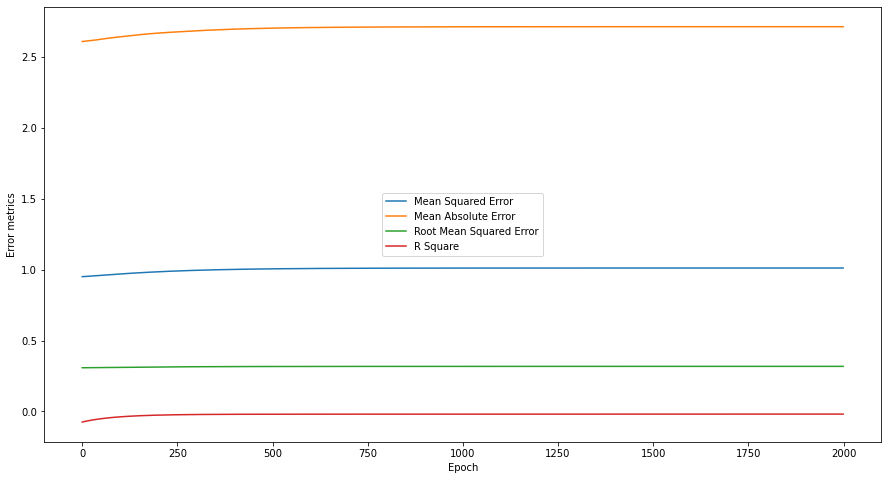

In [410]:
df_error_metric = pd.DataFrame({"Mean Squared Error": mse_list, "Mean Absolute Error": mae_list, "Root Mean Squared Error": rmse_list, "R Square": r2_list})
ax = df_error_metric.plot(figsize=(15, 8))
ax.set_xlabel("Epoch")
ax.set_ylabel("Error metrics")
ax.legend(loc='center')

<AxesSubplot:title={'center':'R2 Score'}>

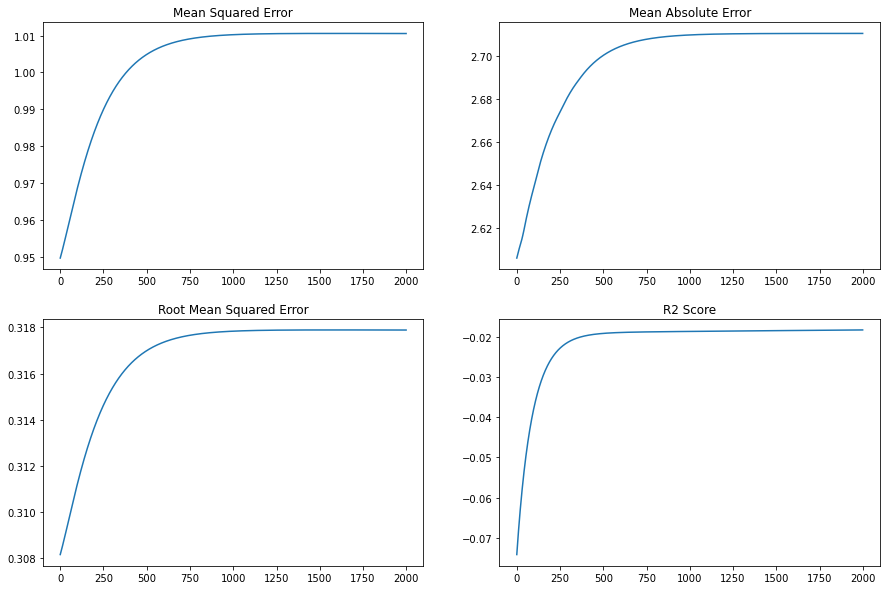

In [411]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

df_error_metric = pd.DataFrame({"Mean_Squared_Error": mse_list, "Mean_Absolute_Error": mae_list, "Root_Mean_Squared_Error": rmse_list, "R2": r2_list})
#ax = df_error_metric.plot()
df_error_metric.Mean_Squared_Error.plot(ax=axes[0,0], title="Mean Squared Error")
df_error_metric.Mean_Absolute_Error.plot(ax=axes[0,1], title="Mean Absolute Error")
df_error_metric.Root_Mean_Squared_Error.plot(ax=axes[1,0], title="Root Mean Squared Error")
df_error_metric.R2.plot(ax=axes[1,1], title="R2 Score")

In [412]:
# test on dataset of size 500

# feedforward on hidden layer
input_hidden_layer = np.dot(x_500, w_1)
output_hidden_layer = sigmoid(input_hidden_layer)
# on ouput layer
input_output_layer = np.dot(output_hidden_layer, w_2)
output_output_layer = sigmoid(input_output_layer)

N = y_500.size
normalized_y_500 = normalized_y_500.reshape((N, 1))
# evaluate the testing through error metrics
mse = mean_squared_error(output_output_layer, normalized_y_500, N)
mae = mean_absolute_error(output_output_layer, normalized_y_500, N)
rmse = root_mean_squared_error(output_output_layer, normalized_y_500, N)
r2_square = r2_score(normalized_y_500, output_output_layer)

In [413]:
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R Square: ", r2_square)

Mean Squared Error:  0.018415725201676256
Mean Absolute Error:  0.11163633809550182
Root Mean Squared Error:  0.006068892024360997
R Square:  -10.118053248584943


In [414]:
# train a neural network with training dataset size of 50
learn_rate = 0.1
epochs = 2000
N = normalized_y_50.size
x_train = x_50
y_train = normalized_y_50 

# number of units for input layer, hidden layer and output layer
n_input = 2
n_hidden = 2
n_output = 1

# create the initial weights
np.random.seed(5)
w_1 = np.random.normal(size=(n_input, n_hidden))   # (2, 2)
w_2 = np.random.normal(size=(n_hidden, n_output))  # (2, 1)

mse_list = []
mae_list = []
rmse_list = []
r2_list = []

In [415]:
for epoch in range(epochs):    
    
    # feedforward on hidden layer
    input_hidden_layer = np.dot(x_train, w_1)
    output_hidden_layer = sigmoid(input_hidden_layer)
    # on ouput layer
    input_output_layer = np.dot(output_hidden_layer, w_2)
    output_output_layer = sigmoid(input_output_layer)
    
    
    # calculate error metric and record it into lists
    mse = mean_squared_error(output_output_layer, y_train, N)
    mae = mean_absolute_error(output_output_layer, y_train, N)
    rmse = root_mean_squared_error(output_output_layer, y_train, N)
    r2_square = r2_score(y_train, output_output_layer)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2_square)
    
    # backpropagation 
    er_output_layer = output_output_layer - y_train.reshape((y_train.size, 1))
    delta_output_layer = er_output_layer * (1/2) * (1+ output_output_layer) * (1 - output_output_layer)

    er_hidden_layer = np.dot(delta_output_layer, w_2.T)
    delt_hidden_layer = er_hidden_layer * (1/2) * (1+ output_hidden_layer) * (1 - output_hidden_layer)

    
    # weight updates
    w_2_update = np.dot(output_hidden_layer.T, delta_output_layer) / N
    w_1_update = np.dot(x_train.T, delt_hidden_layer) / N

    w_2 = w_2 - learn_rate * w_2_update
    w_1 = w_1 - learn_rate * w_1_update

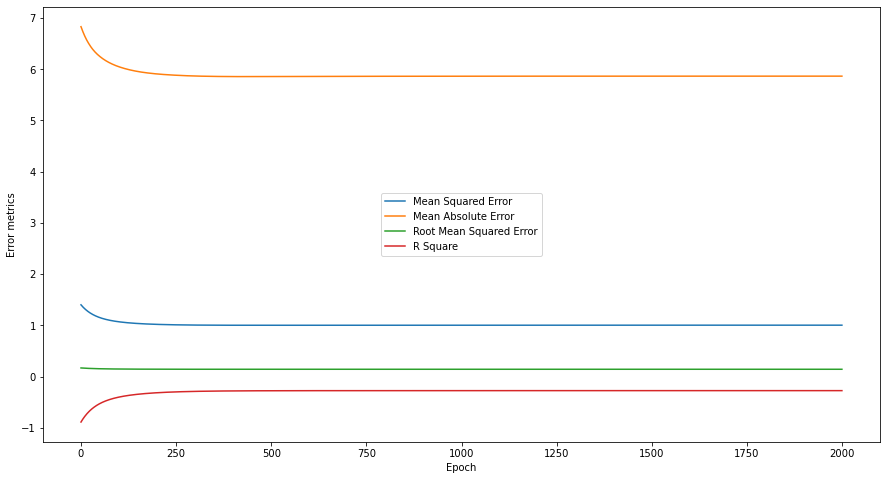

In [416]:
df_error_metric = pd.DataFrame({"Mean Squared Error": mse_list, "Mean Absolute Error": mae_list, "Root Mean Squared Error": rmse_list, "R Square": r2_list})
ax = df_error_metric.plot(figsize=(15, 8))
ax.set_xlabel("Epoch")
ax.set_ylabel("Error metrics")
ax.legend(loc='center')

<AxesSubplot:title={'center':'R2 Square'}>

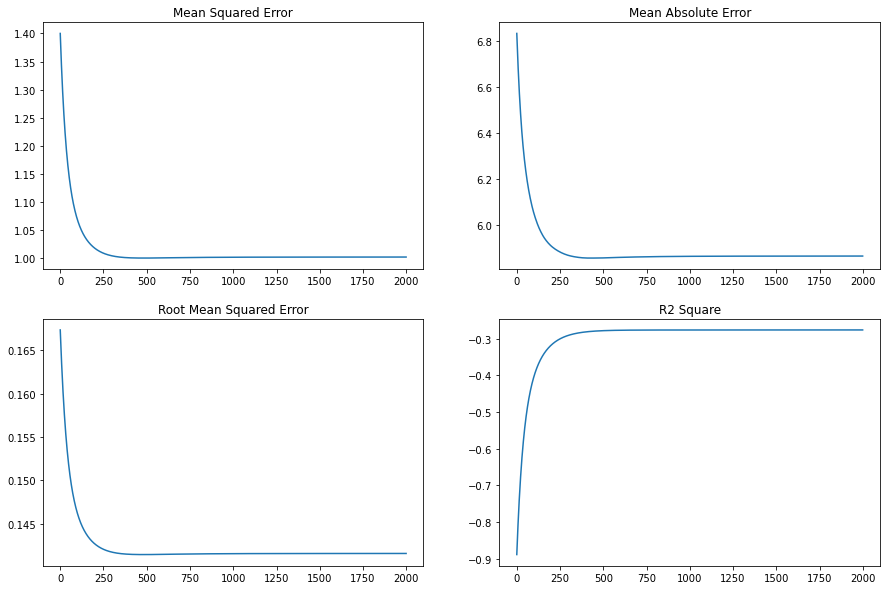

In [417]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

df_error_metric = pd.DataFrame({"Mean_Squared_Error": mse_list, "Mean_Absolute_Error": mae_list, "Root_Mean_Squared_Error": rmse_list, "R_Square": r2_list})
#ax = df_error_metric.plot()
df_error_metric.Mean_Squared_Error.plot(ax=axes[0,0], title="Mean Squared Error")
df_error_metric.Mean_Absolute_Error.plot(ax=axes[0,1], title="Mean Absolute Error")
df_error_metric.Root_Mean_Squared_Error.plot(ax=axes[1,0], title="Root Mean Squared Error")
df_error_metric.R_Square.plot(ax=axes[1,1], title="R2 Square")

In [418]:
# test on dataset of size 500

# feedforward on hidden layer
input_hidden_layer = np.dot(x_500, w_1)
output_hidden_layer = sigmoid(input_hidden_layer)
# on ouput layer
input_output_layer = np.dot(output_hidden_layer, w_2)
output_output_layer = sigmoid(input_output_layer)

N = y_500.size
normalized_y_500 = normalized_y_500.reshape((N, 1))
# evaluate the testing through error metrics
mse = mean_squared_error(output_output_layer, normalized_y_500, N)
mae = mean_absolute_error(output_output_layer, normalized_y_500, N)
rmse = root_mean_squared_error(output_output_layer, normalized_y_500, N)
r2_square = r2_score(normalized_y_500, output_output_layer)

In [419]:
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R Square: ", r2_square)

Mean Squared Error:  0.0021681779936927174
Mean Absolute Error:  0.03582861770030515
Root Mean Squared Error:  0.0020823918909238562
R Square:  -0.30898556110576125


# Question 4 (a)

In [423]:
import numpy as np
import itertools

# import training data
train_set = np.array([[-1,1,-1,1,-1,1,1,1,1,1,-1,1,1,-1,1], 
                      [1,1,-1,1,-1,1,1,1,-1,1,-1,1,1,1,-1],
                     [-1,1,1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1],
                     [1,1,-1,1,-1,1,1,-1,1,1,-1,1,1,1,-1],
                     [1,1,1,1,-1,-1,1,1,-1,1,-1,-1,1,1,1],
                     [1,1,1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1],
                     [-1,1,1,1,-1,-1,1,-1,1,1,-1,1,-1,1,1],
                     [1,-1,1,1,-1,1,1,1,1,1,-1,1,1,-1,1]])
y_set = np.array([[-1,-1,-1],
                 [-1,-1,1],
                 [-1,1,-1],
                 [-1,1,1],
                 [1,-1,-1],
                 [1,-1,1],
                 [1,1,-1],
                 [1,1,1]])

# produce the possible combinations for three different architectures,
# three seeds, and three learning rate
archi_list = [[15,3,2,3], [15,2,3], [15,3,3]] # order: input layer, hidden layer, and output layer
seeds_list = [10, 30, 50]
learn_rate_list = [0.1, 0.5, 0.9]
comb = list(itertools.product(archi_list, seeds_list, learn_rate_list))
print("The number of types of combination: ", len(comb))
print(comb)

The number of types of combination:  27
[([15, 3, 2, 3], 10, 0.1), ([15, 3, 2, 3], 10, 0.5), ([15, 3, 2, 3], 10, 0.9), ([15, 3, 2, 3], 30, 0.1), ([15, 3, 2, 3], 30, 0.5), ([15, 3, 2, 3], 30, 0.9), ([15, 3, 2, 3], 50, 0.1), ([15, 3, 2, 3], 50, 0.5), ([15, 3, 2, 3], 50, 0.9), ([15, 2, 3], 10, 0.1), ([15, 2, 3], 10, 0.5), ([15, 2, 3], 10, 0.9), ([15, 2, 3], 30, 0.1), ([15, 2, 3], 30, 0.5), ([15, 2, 3], 30, 0.9), ([15, 2, 3], 50, 0.1), ([15, 2, 3], 50, 0.5), ([15, 2, 3], 50, 0.9), ([15, 3, 3], 10, 0.1), ([15, 3, 3], 10, 0.5), ([15, 3, 3], 10, 0.9), ([15, 3, 3], 30, 0.1), ([15, 3, 3], 30, 0.5), ([15, 3, 3], 30, 0.9), ([15, 3, 3], 50, 0.1), ([15, 3, 3], 50, 0.5), ([15, 3, 3], 50, 0.9)]


In [448]:
# bipolar function as activation function
def sigmoid(x):
    return (2 / (1 + np.exp(-x))) - 1

# threshold to identify class
def threshold_class(x):
    pred_result = []
    for item in x:
        pred_class = []
        for i in range(0,item.size):
            if item[i] >=0:
                pred_class.append(1)
            else:
                pred_class.append(-1)
        pred_result.append(pred_class)
    return np.array(pred_result)

# Establish the 2 hidden layers architecture
learn_rate = 0.9
epochs = 5000
N = y_set.shape[0]

# number of units for input layer, hidden layer and output layer
n_input = 15
n_hidden_1 = 3
n_hidden_2 = 2
n_output = 3

# create the initial weights
np.random.seed(10)
w_1 = np.random.normal(size=(n_input, n_hidden_1))
#w_1_b = np.random.normal(size=(1, n_hidden_1))
w_2 = np.random.normal(size=(n_hidden_1, n_hidden_2))
#w_2_b = np.random.normal(size=(1, n_hidden_2))
w_3 = np.random.normal(size=(n_hidden_2, n_output))
#w_3_b = np.random.normal(size=(1, n_output))

acc_list = []
err_list = []

In [449]:
for epoch in range(epochs):
    input_hidden_layer_1 = np.dot(train_set, w_1)
    output_hidden_layer_1 = sigmoid(input_hidden_layer_1)
    # 2nd hidden layer
    input_hidden_layer_2 = np.dot(output_hidden_layer_1, w_2)
    output_hidden_layer_2 = sigmoid(input_hidden_layer_2)
    # on ouput layer
    input_output_layer = np.dot(output_hidden_layer_2, w_3)
    output_output_layer = sigmoid(input_output_layer)
    pred_value = threshold_class(output_output_layer)
    
    # calculate accuracy rate and error rate
    acc_count = sum(list(x) == list(y) for x, y in zip(list(pred_value), list(y_set)))
    acc_rate = acc_count / y_set.shape[0]
    err_rate = (y_set.shape[0] - acc_count) / y_set.shape[0]
    acc_list.append(acc_rate)
    err_list.append(err_rate)
    
    # backpropagation 
    er_output_layer = output_output_layer - y_set
    delta_output_layer = er_output_layer * (1/2) * (1+ output_output_layer) * (1 - output_output_layer)

    er_hidden_layer_2 = np.dot(delta_output_layer, w_3.T)
    delta_hidden_layer_2 = er_hidden_layer_2 * (1/2) * (1+ output_hidden_layer_2) * (1 - output_hidden_layer_2)

    er_hidden_layer_1 = np.dot(delta_hidden_layer_2, w_2.T)
    delta_hidden_layer_1 = er_hidden_layer_1 * (1/2) * (1+ output_hidden_layer_1) * (1 - output_hidden_layer_1)


    # weight updates
    w_3_update = np.dot(output_hidden_layer_2.T, delta_output_layer) / N
    w_2_update = np.dot(output_hidden_layer_1.T, delta_hidden_layer_2) / N
    w_1_update = np.dot(train_set.T, delta_hidden_layer_1) / N

    w_3 = w_3 - learn_rate * w_3_update
    w_2 = w_2 - learn_rate * w_2_update
    w_1 = w_1 - learn_rate * w_1_update

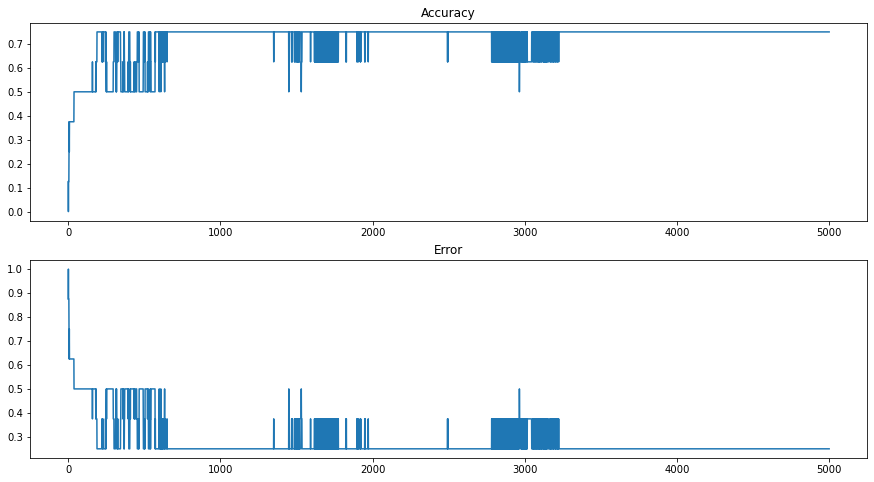

In [455]:
fig, axes = plt.subplots(2, 1, figsize=(15,8))

df_performance = pd.DataFrame({"Accuracy": acc_list, "Error": err_list})
df_performance.Accuracy.plot(ax=axes[0], title="Accuracy")
df_performance.Error.plot(ax=axes[1], title="Error")

# Run for 27 cases

/var/folders/80/hlw2kcj50_131r1nvk0nv9q80000gn/T/ipykernel_45409/3664132260.py:139: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 1, figsize=(15,8))


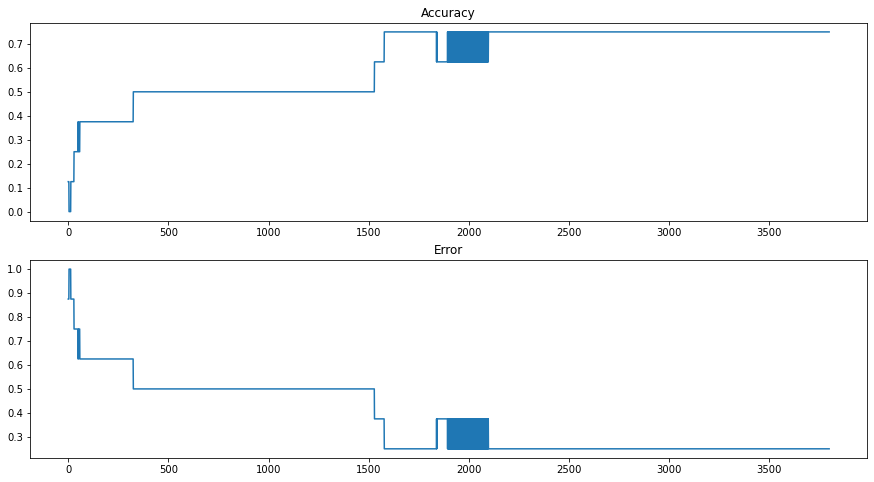

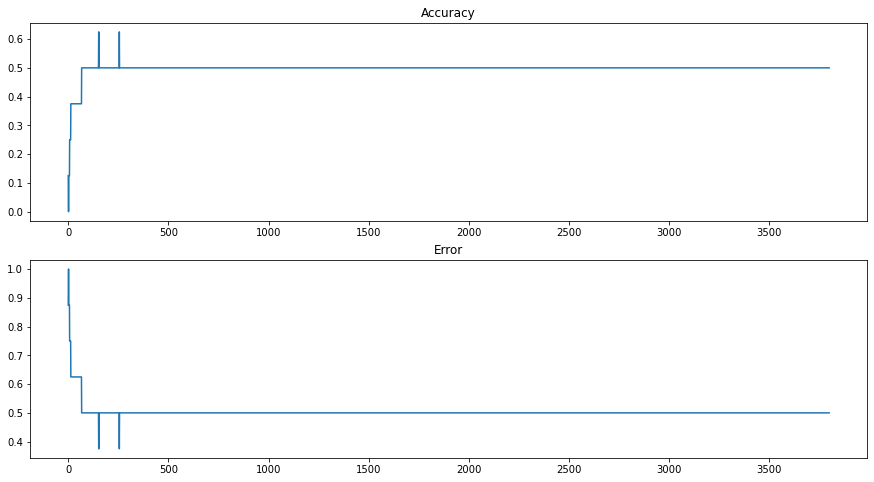

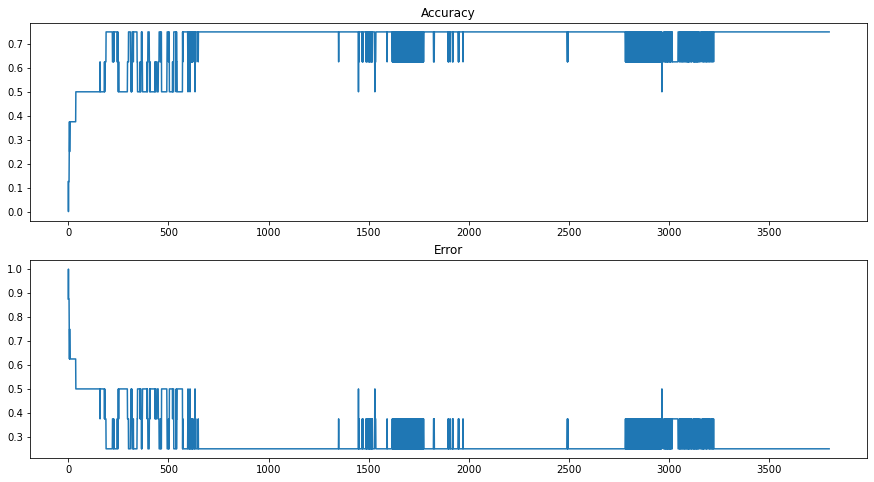

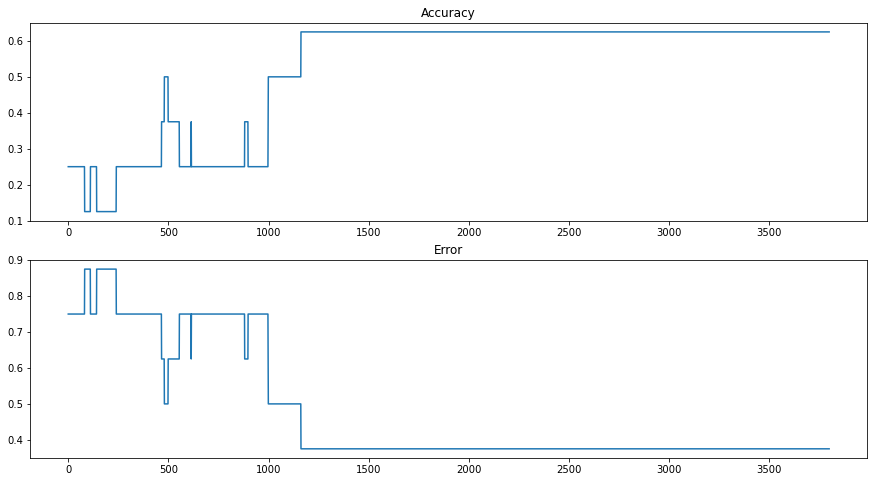

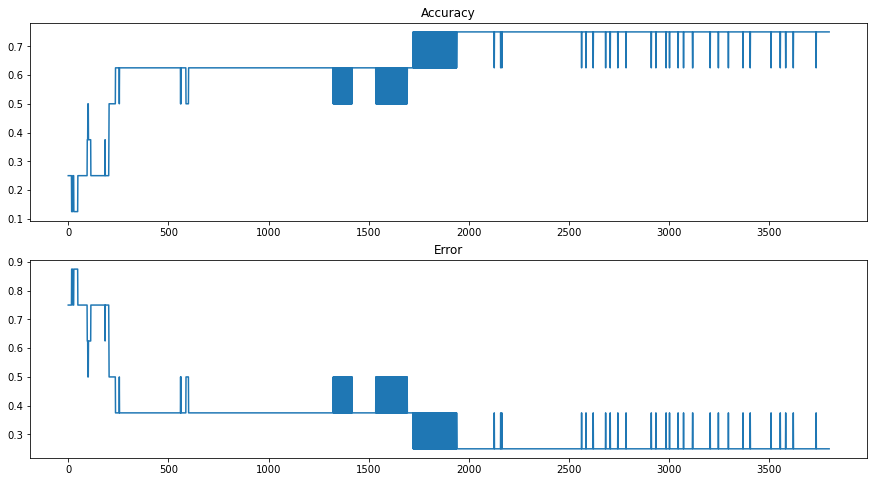

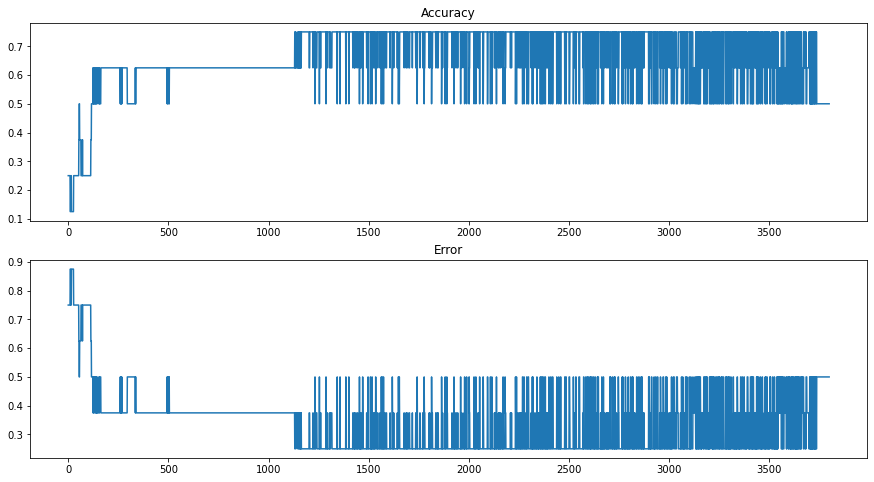

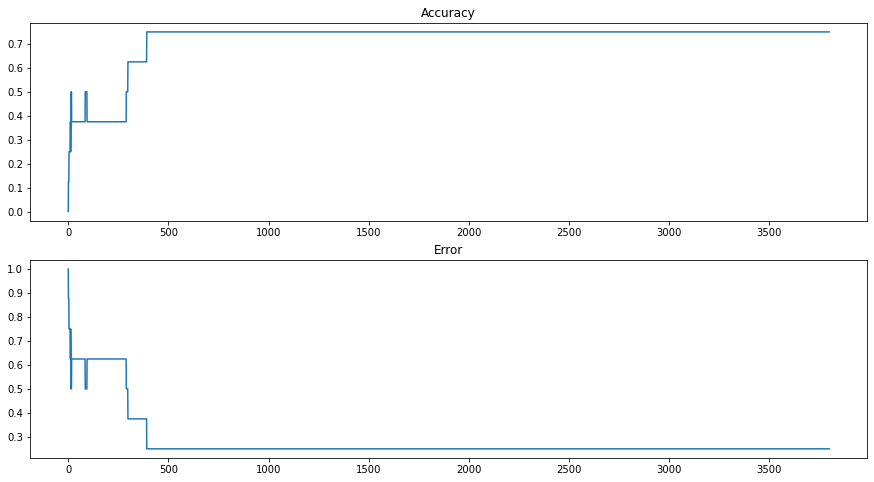

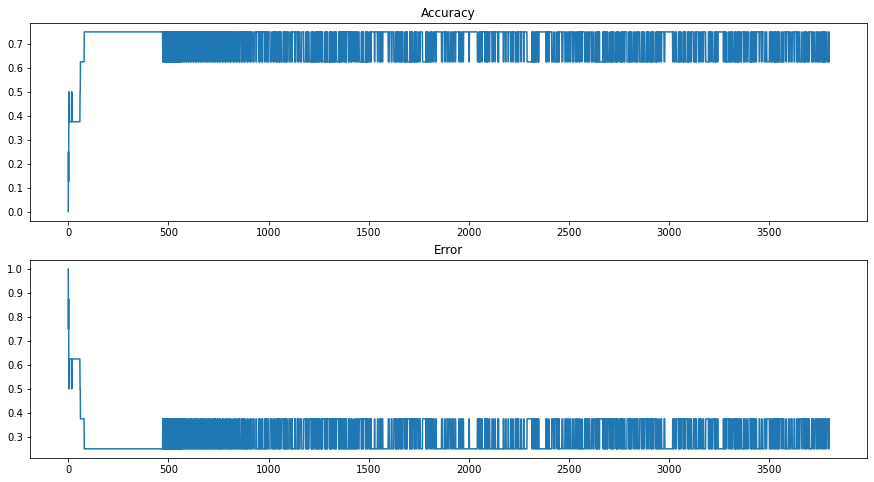

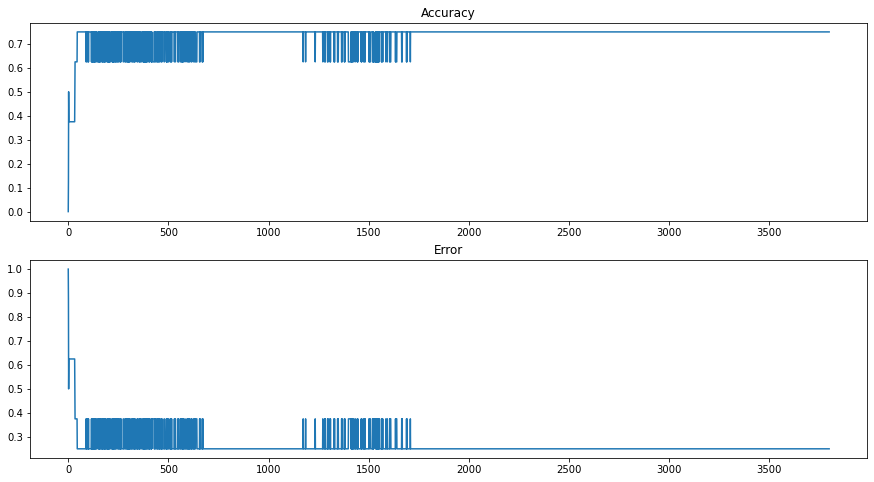

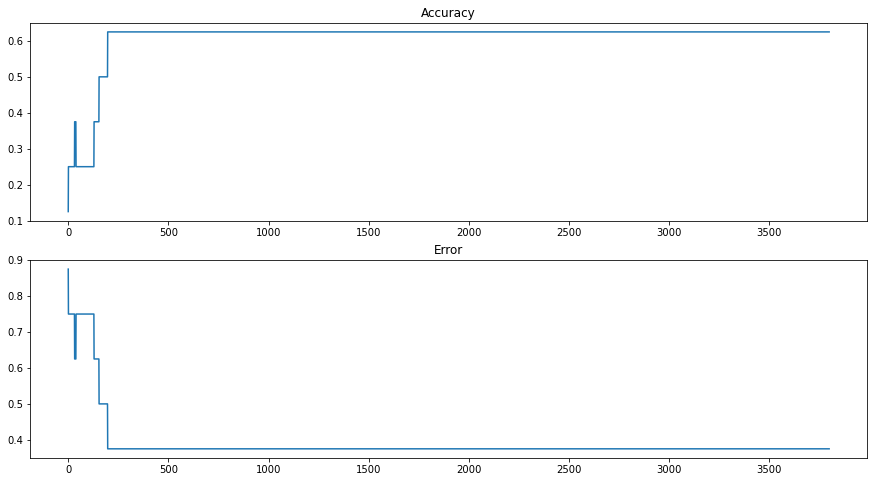

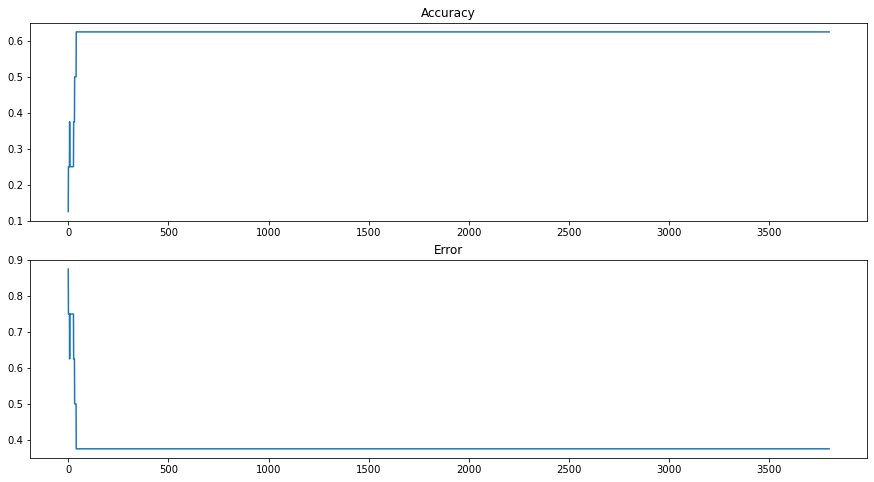

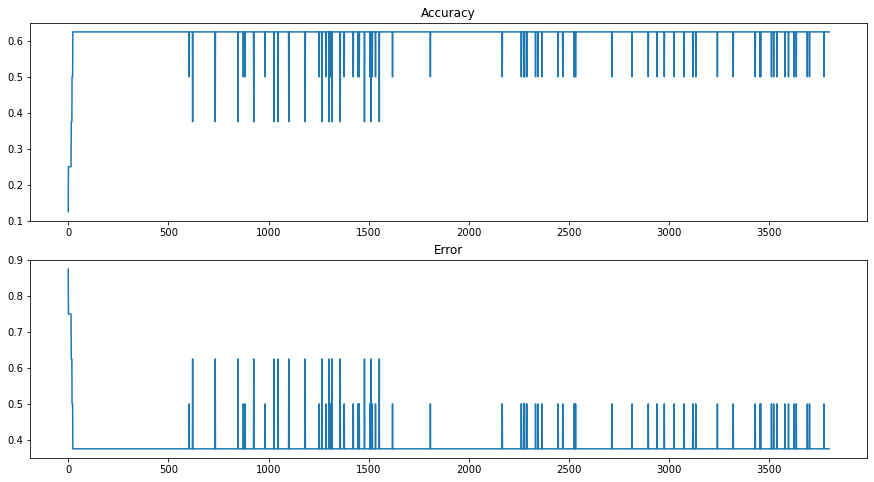

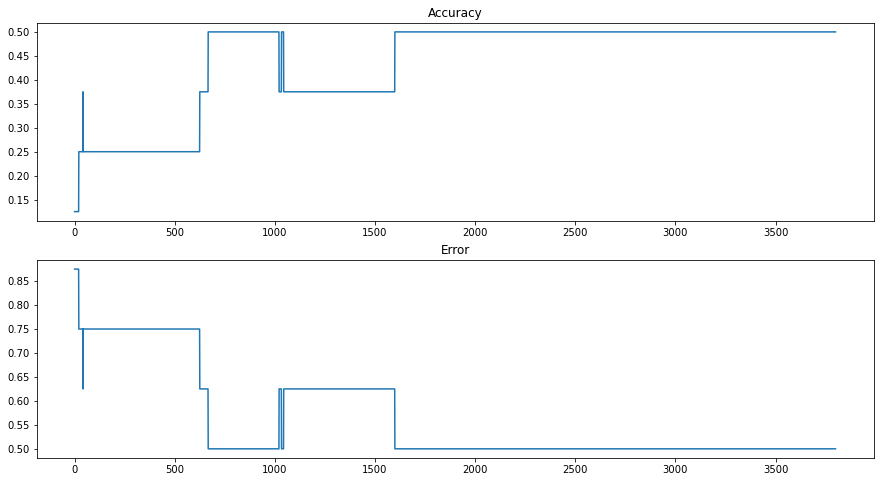

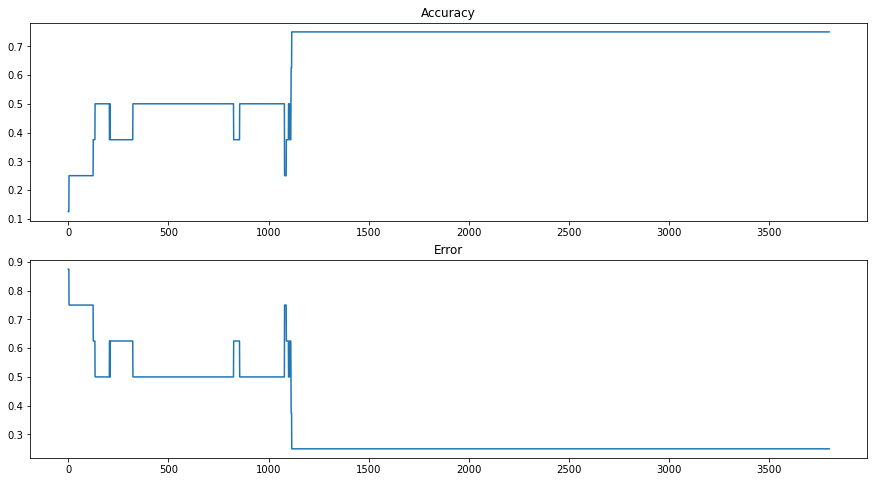

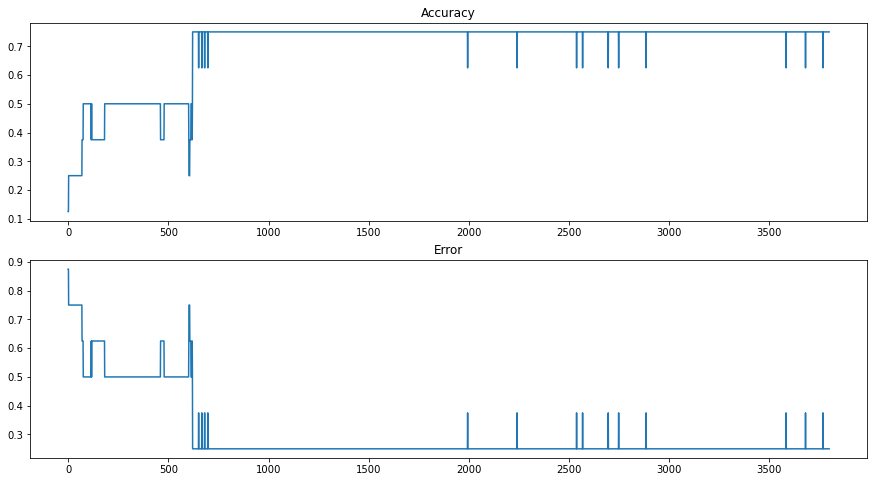

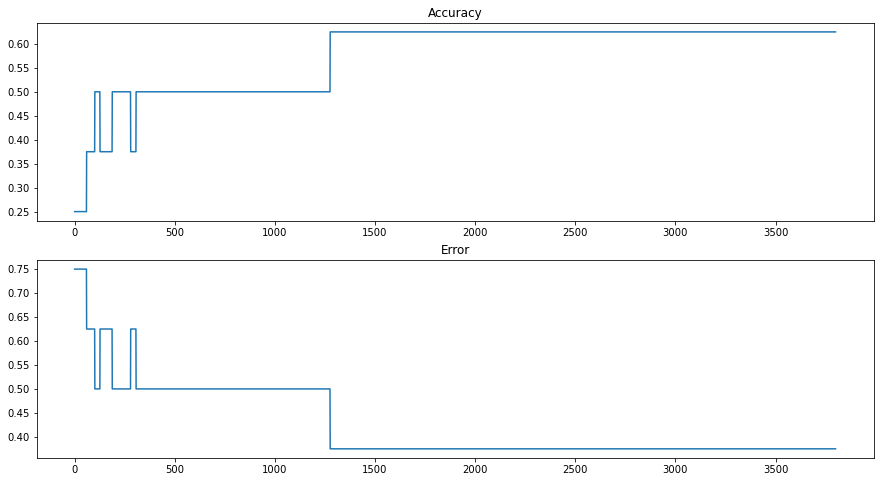

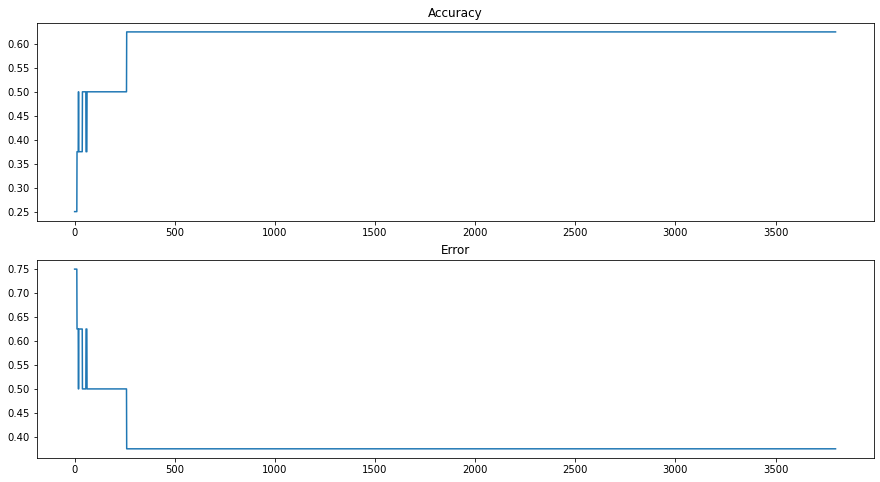

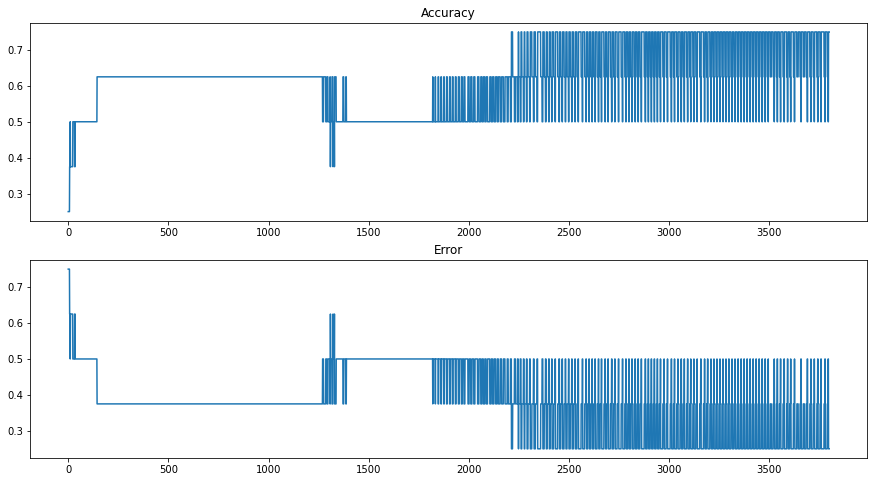

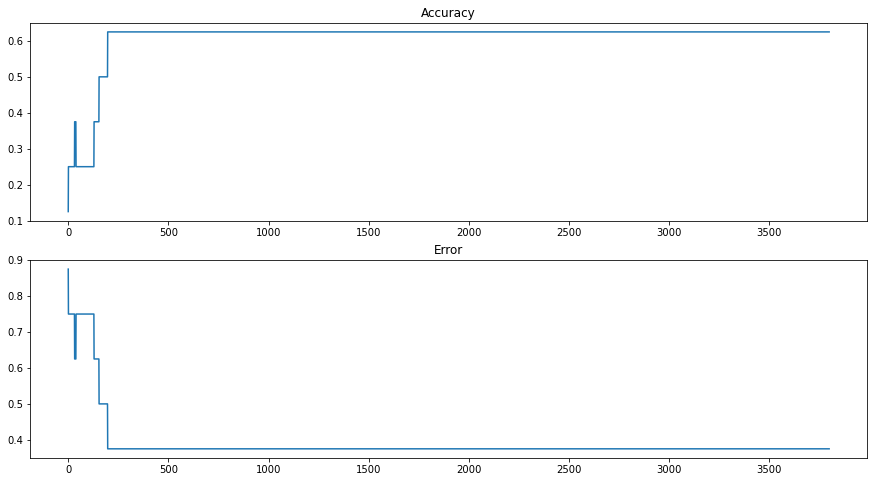

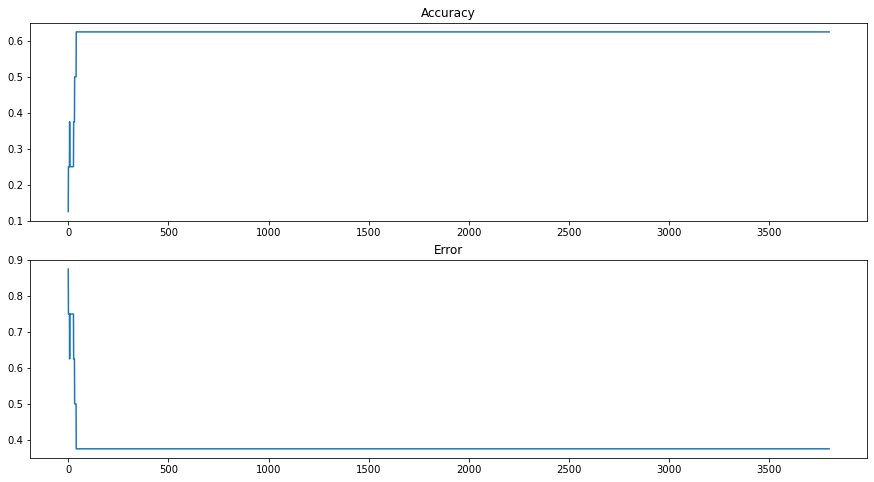

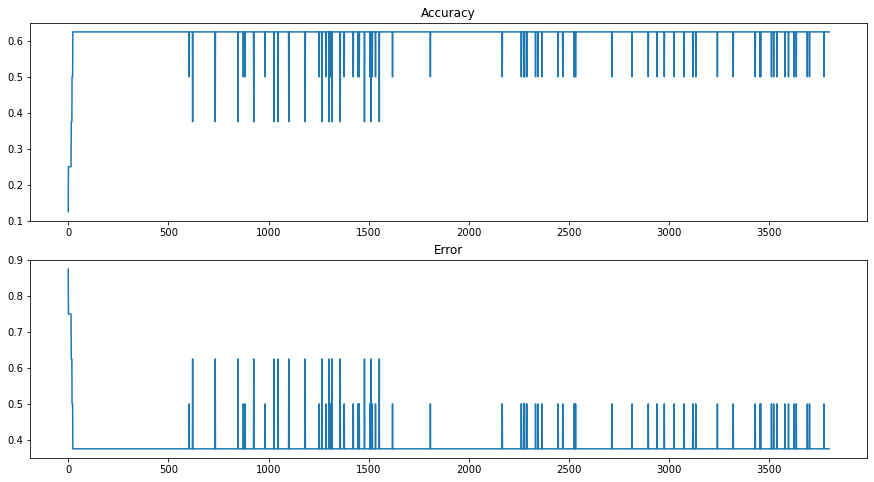

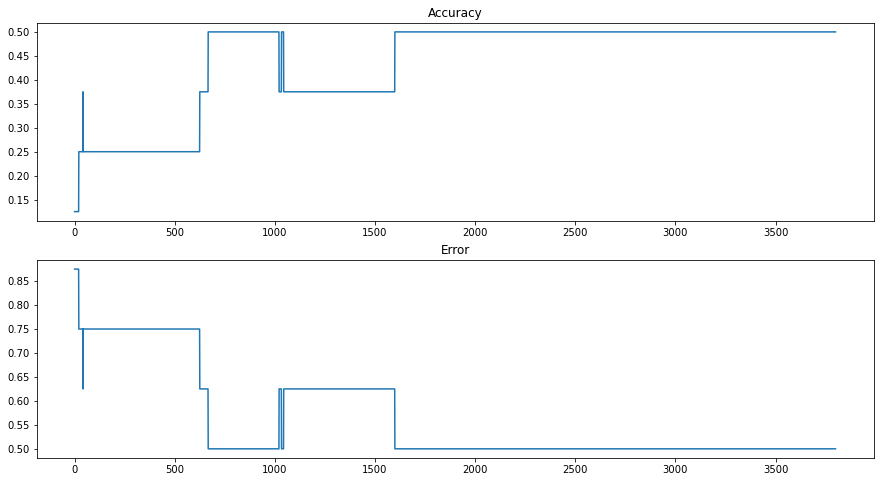

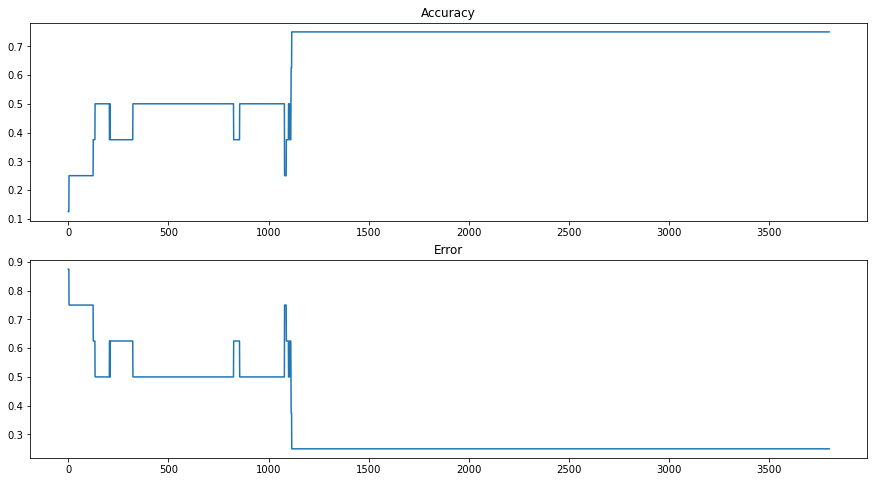

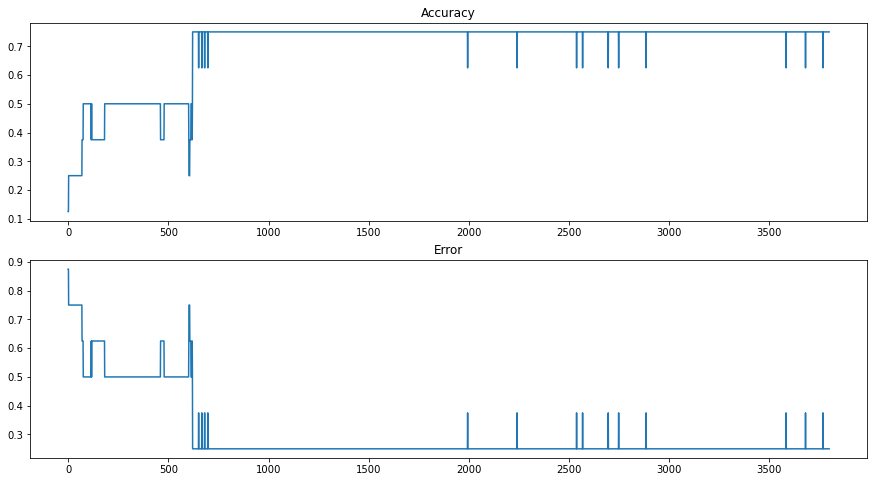

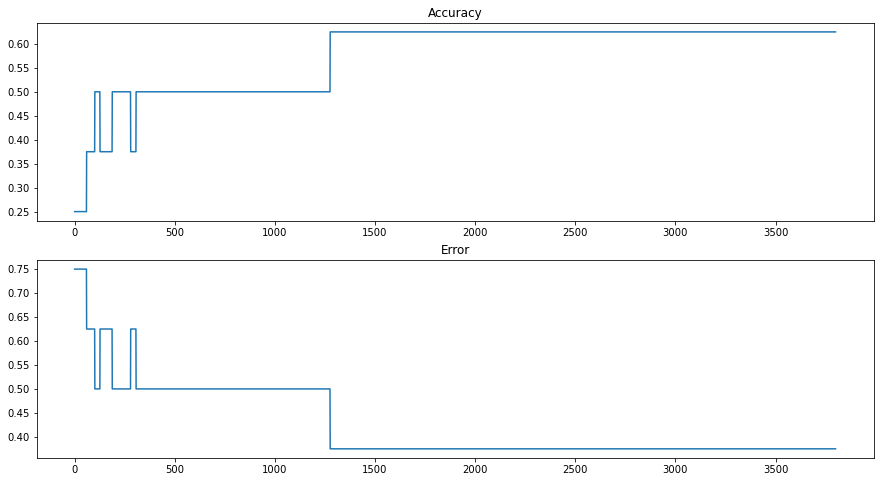

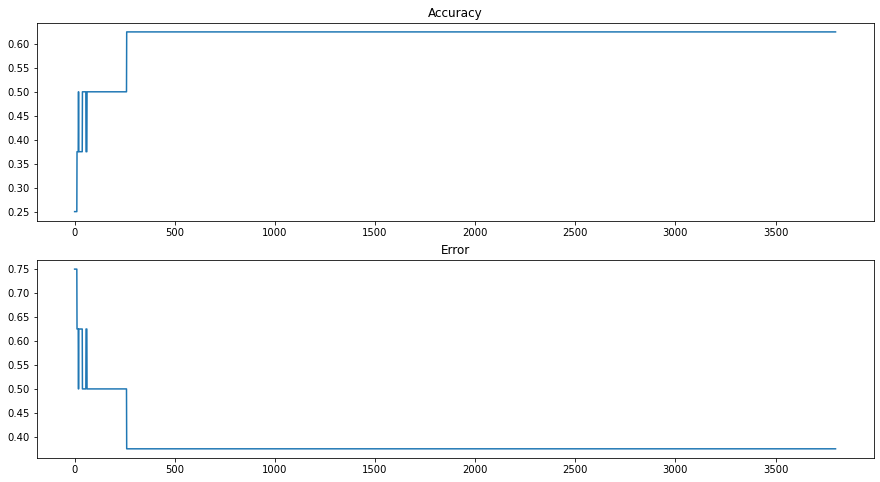

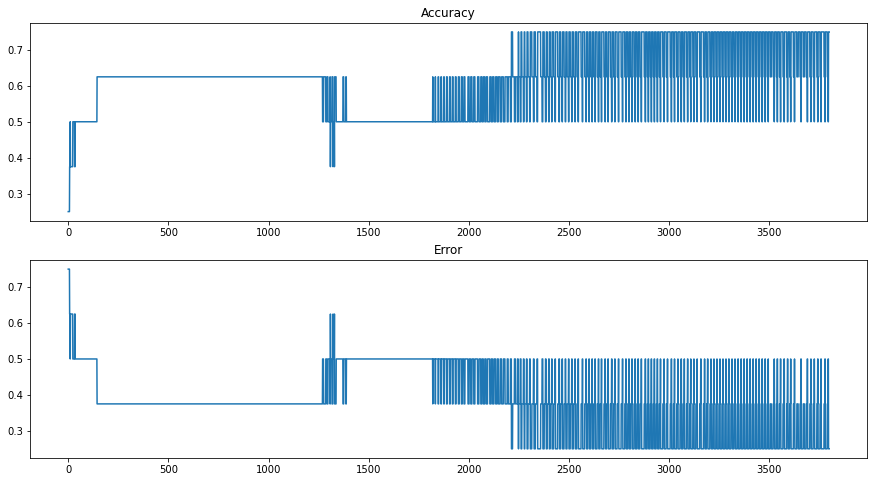

In [461]:
# bipolar function as activation function
def sigmoid(x):
    return (2 / (1 + np.exp(-x))) - 1

# threshold to identify class
def threshold_class(x):
    pred_result = []
    for item in x:
        pred_class = []
        for i in range(0,item.size):
            if item[i] >=0:
                pred_class.append(1)
            else:
                pred_class.append(-1)
        pred_result.append(pred_class)
    return np.array(pred_result)

case_list = []
acc_case_list = []
err_case_list = []
for case in comb:
    arch = case[0]
    N = y_set.shape[0]
    # identify the 1 and 2 hidden layer cases
    if len(arch) > 3:
        epochs = 3800
        seed = case[1]
        learn_rate = case[2]
        # number of units for input layer, hidden layer and output layer
        n_input = arch[0]
        n_hidden_1 = arch[1]
        n_hidden_2 = arch[2]
        n_output = arch[3]
        
        # create the initial weights
        np.random.seed(seed)
        w_1 = np.random.normal(size=(n_input, n_hidden_1))
        w_2 = np.random.normal(size=(n_hidden_1, n_hidden_2))
        w_3 = np.random.normal(size=(n_hidden_2, n_output))

        acc_list = []
        err_list = []
        
        for epoch in range(epochs):
            input_hidden_layer_1 = np.dot(train_set, w_1)
            output_hidden_layer_1 = sigmoid(input_hidden_layer_1)
            # 2nd hidden layer
            input_hidden_layer_2 = np.dot(output_hidden_layer_1, w_2)
            output_hidden_layer_2 = sigmoid(input_hidden_layer_2)
            # on ouput layer
            input_output_layer = np.dot(output_hidden_layer_2, w_3)
            output_output_layer = sigmoid(input_output_layer)
            pred_value = threshold_class(output_output_layer)

            # calculate accuracy rate and error rate
            acc_count = sum(list(x) == list(y) for x, y in zip(list(pred_value), list(y_set)))
            acc_rate = acc_count / y_set.shape[0]
            err_rate = (y_set.shape[0] - acc_count) / y_set.shape[0]
            acc_list.append(acc_rate)
            err_list.append(err_rate)

            # backpropagation 
            er_output_layer = output_output_layer - y_set
            delta_output_layer = er_output_layer * (1/2) * (1+ output_output_layer) * (1 - output_output_layer)

            er_hidden_layer_2 = np.dot(delta_output_layer, w_3.T)
            delta_hidden_layer_2 = er_hidden_layer_2 * (1/2) * (1+ output_hidden_layer_2) * (1 - output_hidden_layer_2)

            er_hidden_layer_1 = np.dot(delta_hidden_layer_2, w_2.T)
            delta_hidden_layer_1 = er_hidden_layer_1 * (1/2) * (1+ output_hidden_layer_1) * (1 - output_hidden_layer_1)


            # weight updates
            w_3_update = np.dot(output_hidden_layer_2.T, delta_output_layer) / N
            w_2_update = np.dot(output_hidden_layer_1.T, delta_hidden_layer_2) / N
            w_1_update = np.dot(train_set.T, delta_hidden_layer_1) / N

            w_3 = w_3 - learn_rate * w_3_update
            w_2 = w_2 - learn_rate * w_2_update
            w_1 = w_1 - learn_rate * w_1_update
            
        # plot accuracy and error curve
        fig, axes = plt.subplots(2, 1, figsize=(15,8))
        df_performance = pd.DataFrame({"Accuracy": acc_list, "Error": err_list})
        df_performance.Accuracy.plot(ax=axes[0], title="Accuracy")
        df_performance.Error.plot(ax=axes[1], title="Error")
        fig.savefig('/HMW-2/'+str(case)+'.png')
        
        acc_case_list.append(acc_rate)
        err_case_list.append(err_rate)
        case_list.append(case)
    else:
        epochs = 3800
        seed = case[1]
        learn_rate = case[2]
        # number of units for input layer, hidden layer and output layer
        n_input = arch[0]
        n_hidden_1 = arch[1]
        n_hidden_2 = arch[2]
        # create the initial weights
        np.random.seed(seed)
        w_1 = np.random.normal(size=(n_input, n_hidden))   
        w_2 = np.random.normal(size=(n_hidden, n_output))
        
        acc_list = []
        err_list = []
        for epoch in range(epochs):    
            # feedforward on hidden layer
            input_hidden_layer = np.dot(train_set, w_1)
            output_hidden_layer = sigmoid(input_hidden_layer)
            # on ouput layer
            input_output_layer = np.dot(output_hidden_layer, w_2)
            output_output_layer = sigmoid(input_output_layer)
            pred_value = threshold_class(output_output_layer)


            # calculate accuracy rate and error rate
            acc_count = sum(list(x) == list(y) for x, y in zip(list(pred_value), list(y_set)))
            acc_rate = acc_count / y_set.shape[0]
            err_rate = (y_set.shape[0] - acc_count) / y_set.shape[0]
            acc_list.append(acc_rate)
            err_list.append(err_rate)

            # backpropagation 
            er_output_layer = output_output_layer - y_set
            delta_output_layer = er_output_layer * (1/2) * (1+ output_output_layer) * (1 - output_output_layer)

            er_hidden_layer = np.dot(delta_output_layer, w_2.T)
            delt_hidden_layer = er_hidden_layer * (1/2) * (1+ output_hidden_layer) * (1 - output_hidden_layer)


            # weight updates
            w_2_update = np.dot(output_hidden_layer.T, delta_output_layer) / N
            w_1_update = np.dot(train_set.T, delt_hidden_layer) / N

            w_2 = w_2 - learn_rate * w_2_update
            w_1 = w_1 - learn_rate * w_1_update
        # plot accuracy and error curve
        fig, axes = plt.subplots(2, 1, figsize=(15,8))
        df_performance = pd.DataFrame({"Accuracy": acc_list, "Error": err_list})
        df_performance.Accuracy.plot(ax=axes[0], title="Accuracy")
        df_performance.Error.plot(ax=axes[1], title="Error")
        fig.savefig('/HMW-2/'+str(case)+'.png')
        
        acc_case_list.append(acc_rate)
        err_case_list.append(err_rate)
        case_list.append(case)

In [463]:
import pandas as pd

df_test_acc_err = pd.DataFrame(data={"Cases(network, seed, learning rate)": case_list, "Accuracy rate": acc_case_list, "Error rate": err_case_list})
df_test_acc_err

,"Cases(network, seed, learning rate)",Accuracy rate,Error rate
0,"([15, 3, 2, 3], 10, 0.1)",0.750,0.250
1,"([15, 3, 2, 3], 10, 0.5)",0.500,0.500
2,"([15, 3, 2, 3], 10, 0.9)",0.750,0.250
3,"([15, 3, 2, 3], 30, 0.1)",0.625,0.375
4,"([15, 3, 2, 3], 30, 0.5)",0.750,0.250
5,"([15, 3, 2, 3], 30, 0.9)",0.500,0.500
6,"([15, 3, 2, 3], 50, 0.1)",0.750,0.250
7,"([15, 3, 2, 3], 50, 0.5)",0.625,0.375
8,"([15, 3, 2, 3], 50, 0.9)",0.750,0.250
9,"([15, 2, 3], 10, 0.1)",0.625,0.375


In [464]:
df_test_acc_err.to_csv("case_acc_err.csv")

# Question 4 (b)(i)

In [466]:
# corrupt input pattern slightly 
# change 2 items in each patter
test_set_1 = np.array([[1,1,-1,1,-1,1,-1,1,1,1,-1,1,1,-1,1], 
                      [-1,1,-1,1,-1,1,1,1,1,1,-1,1,1,1,-1],
                     [-1,-1,1,1,-1,-1,1,1,-1,1,-1,-1,-1,1,1],
                     [1,1,-1,1,1,1,1,1,1,1,-1,1,1,1,-1],
                     [1,1,1,1,-1,-1,1,1,1,1,-1,-1,1,1,-1],
                     [1,1,1,-1,-1,-1,1,1,-1,1,-1,-1,1,1,-1],
                     [-1,1,1,-1,-1,-1,1,-1,1,1,1,1,-1,1,1],
                     [1,-1,1,-1,-1,1,1,1,1,-1,-1,1,1,-1,1]])

In [465]:
chosen_network_case = ([15, 3, 2, 3], 10, 0.1)

epochs = 3800
seed = chosen_network_case[1]
learn_rate = chosen_network_case[2]
# number of units for input layer, hidden layer and output layer
n_input = chosen_network_case[0][0]
n_hidden_1 = chosen_network_case[0][1]
n_hidden_2 = chosen_network_case[0][2]
n_output = chosen_network_case[0][3]

# create the initial weights
np.random.seed(seed)
w_1 = np.random.normal(size=(n_input, n_hidden_1))
w_2 = np.random.normal(size=(n_hidden_1, n_hidden_2))
w_3 = np.random.normal(size=(n_hidden_2, n_output))

for epoch in range(epochs):
    input_hidden_layer_1 = np.dot(train_set, w_1)
    output_hidden_layer_1 = sigmoid(input_hidden_layer_1)
    # 2nd hidden layer
    input_hidden_layer_2 = np.dot(output_hidden_layer_1, w_2)
    output_hidden_layer_2 = sigmoid(input_hidden_layer_2)
    # on ouput layer
    input_output_layer = np.dot(output_hidden_layer_2, w_3)
    output_output_layer = sigmoid(input_output_layer)
    pred_value = threshold_class(output_output_layer)

    # calculate accuracy rate and error rate
    acc_count = sum(list(x) == list(y) for x, y in zip(list(pred_value), list(y_set)))
    acc_rate = acc_count / y_set.shape[0]
    err_rate = (y_set.shape[0] - acc_count) / y_set.shape[0]
    acc_list.append(acc_rate)
    err_list.append(err_rate)

    # backpropagation 
    er_output_layer = output_output_layer - y_set
    delta_output_layer = er_output_layer * (1/2) * (1+ output_output_layer) * (1 - output_output_layer)

    er_hidden_layer_2 = np.dot(delta_output_layer, w_3.T)
    delta_hidden_layer_2 = er_hidden_layer_2 * (1/2) * (1+ output_hidden_layer_2) * (1 - output_hidden_layer_2)

    er_hidden_layer_1 = np.dot(delta_hidden_layer_2, w_2.T)
    delta_hidden_layer_1 = er_hidden_layer_1 * (1/2) * (1+ output_hidden_layer_1) * (1 - output_hidden_layer_1)


    # weight updates
    w_3_update = np.dot(output_hidden_layer_2.T, delta_output_layer) / N
    w_2_update = np.dot(output_hidden_layer_1.T, delta_hidden_layer_2) / N
    w_1_update = np.dot(train_set.T, delta_hidden_layer_1) / N

    w_3 = w_3 - learn_rate * w_3_update
    w_2 = w_2 - learn_rate * w_2_update
    w_1 = w_1 - learn_rate * w_1_update

In [467]:
# test on slightly corrupted dataset

# feedforward on hidden layer
input_hidden_layer_1 = np.dot(test_set_1, w_1)
output_hidden_layer_1 = sigmoid(input_hidden_layer_1)
# 2nd hidden layer
input_hidden_layer_2 = np.dot(output_hidden_layer_1, w_2)
output_hidden_layer_2 = sigmoid(input_hidden_layer_2)
# on ouput layer
input_output_layer = np.dot(output_hidden_layer_2, w_3)
output_output_layer = sigmoid(input_output_layer)
pred_value_1 = threshold_class(output_output_layer)

# calculate accuracy rate and error rate
acc_count = sum(list(x) == list(y) for x, y in zip(list(pred_value_1), list(y_set)))
acc_rate = acc_count / y_set.shape[0]
err_rate = (y_set.shape[0] - acc_count) / y_set.shape[0]
print("Accuracy rate: ", acc_rate)
print("Error rate: ", err_rate)

Accuracy rate:  0.25
Error rate:  0.75


# Question 4 (b)(ii)

In [468]:
# corrupt input pattern severely
# change 8 items in each patter
test_set_2 = np.array([[1,-1,1,1,-1,1,-1,1,1,1,1,1,-1,1,-1], 
                      [-1,1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,1],
                     [-1,-1,1,1,1,-1,-1,1,-1,-1,1,-1,1,1,-1],
                     [-1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,1,1],
                     [1,-1,1,1,1,-1,-1,1,1,1,1,-1,-1,-1,-1],
                     [-1,1,-1,-1,-1,1,1,-1,-1,-1,-1,1,1,1,-1],
                     [-1,1,-1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1],
                     [1,1,1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1,-1]])

In [469]:
# test on severely corrupted dataset

# feedforward on hidden layer
input_hidden_layer_1 = np.dot(test_set_2, w_1)
output_hidden_layer_1 = sigmoid(input_hidden_layer_1)
# 2nd hidden layer
input_hidden_layer_2 = np.dot(output_hidden_layer_1, w_2)
output_hidden_layer_2 = sigmoid(input_hidden_layer_2)
# on ouput layer
input_output_layer = np.dot(output_hidden_layer_2, w_3)
output_output_layer = sigmoid(input_output_layer)
pred_value_2 = threshold_class(output_output_layer)

# calculate accuracy rate and error rate
acc_count = sum(list(x) == list(y) for x, y in zip(list(pred_value_2), list(y_set)))
acc_rate = acc_count / y_set.shape[0]
err_rate = (y_set.shape[0] - acc_count) / y_set.shape[0]
print("Accuracy rate: ", acc_rate)
print("Error rate: ", err_rate)

Accuracy rate:  0.125
Error rate:  0.875
